In [257]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


train_loc ="train.csv";
train = pd.read_csv(file_loc);

test_loc ="test.csv";
test = pd.read_csv(test_loc);


In [258]:
print train.shape
print test.shape
k = 0
for x in range(0,8):
    print train.iloc[:,k:k+10].head(5)
    print train.iloc[:,k:k+10].isnull().sum()
    print train.iloc[:,k:k+10].describe()
    k = k +10


(1460, 81)
(1459, 80)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub
Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64
                Id   MSSubClass  LotFrontage        LotArea
count  1460.000000  1460.000000  1201.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082
std     421.610009    42.30

In [347]:
correlations = train.corr(method='pearson', min_periods=1)

correlations[correlations['SalePrice'] >= 0.5 ]



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,0.288886,0.323722,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.484557,0.469672,0.405656,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,0.250647,0.285573,0.409516,0.616423,0.131185,0.825489,-0.053275,-0.023836,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.148112,0.362289,0.337822,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,0.214175,0.434585,0.439317,0.183926,-0.094480,0.467247,0.131881,-0.020891,0.469672,0.219178,0.086106,-0.050634,0.362289,0.300789,0.588920,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,-0.067601,0.468997,0.179189,-0.024536,0.405656,0.163549,0.065253,-0.064433,0.337822,0.269141,0.564567,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.0279

In [344]:
correlations[correlations['SalePrice'] <= -0.5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice


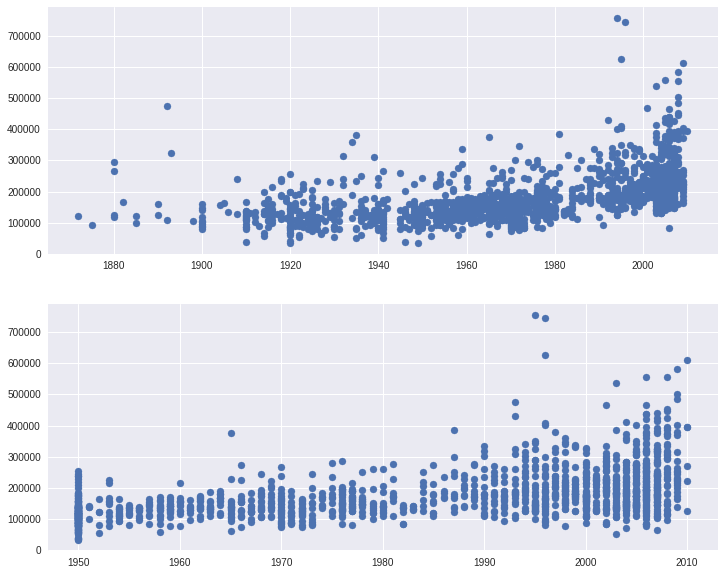

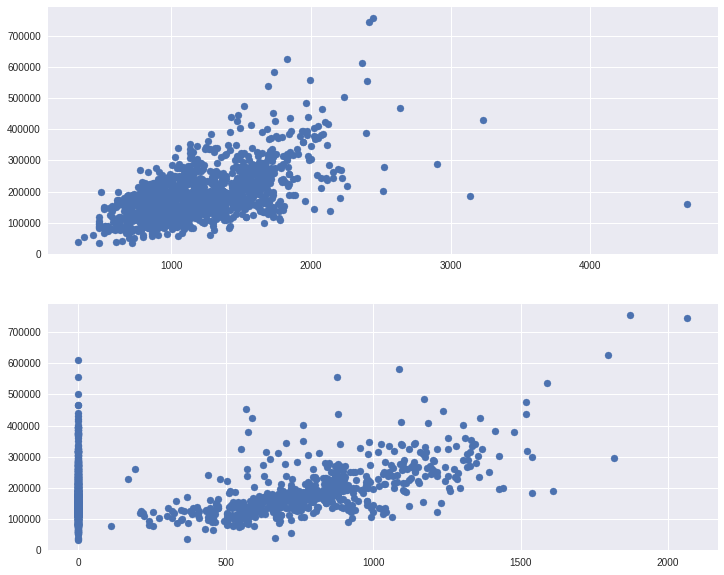

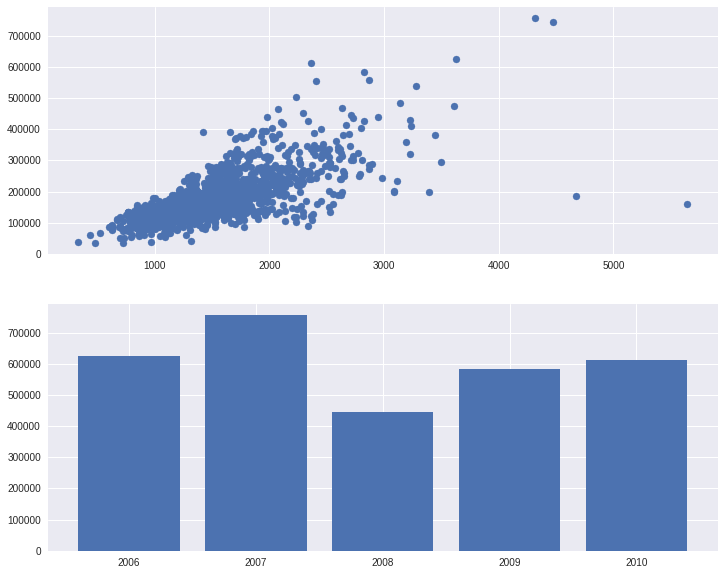

In [333]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.scatter(train['YearBuilt'],train['SalePrice'])
plt.ylabel('Year Built')
plt.ylabel('Sale Price')
plt.subplot(2, 1, 2)
plt.scatter(train['YearRemodAdd'],train['SalePrice'])
plt.ylabel('Year Remodeled')
plt.ylabel('Sale Price')
plt.show()


plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.scatter(train['1stFlrSF'],train['SalePrice'])
plt.ylabel('1st floor area sq feet')
plt.ylabel('Sale Price')
plt.subplot(2, 1, 2)
plt.scatter(train['2ndFlrSF'],train['SalePrice'])
plt.ylabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.subplot(2, 1, 2)
plt.bar(train['YrSold'],train['SalePrice'])
plt.show()



In [162]:


g = train.columns.to_series().groupby(train.dtypes).groups

cols = [u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual', u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish', u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence', u'MiscFeature', u'SaleType', u'SaleCondition']

In [163]:
train_dum = pd.get_dummies(train[cols])


In [175]:
# train.drop(cols, axis=1)

train.num = train.drop(cols,axis=1,inplace=True)
frames = [train, train_dum];

train_f = pd.concat(frames,axis=1)

In [259]:
# year built - 1872
# year remod - 1950
# year sold - 2006


train_f.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,Garag

In [190]:
train_f.YearBuilt = train_f.YearBuilt - 1872

train_f.YearRemodAdd = train_f.YearRemodAdd - 1950

train_f.YrSold = train_f.YrSold - 2006



In [193]:
y_train = train_f['SalePrice']



In [227]:
del train_f['SalePrice']

x_train = train_f

In [229]:


g = train_f.columns.to_series().groupby(train_f.dtypes).groups

train_f.LotFrontage = train_k.LotFrontage.fillna(train_k.LotFrontage.mean())

train_f.GarageYrBlt = train_f.GarageYrBlt.convert_objects(convert_numeric=True)



/home/smauggy/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [274]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 420976888.09
R2 Score: 0.93


In [281]:
reg = linear_model.Ridge(alpha=0.001,max_iter=1000)
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 420978214.22
R2 Score: 0.93


In [277]:
reg = linear_model.RidgeCV(alphas=[0.01,0.1,0.25])
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 440200672.83
R2 Score: 0.93


In [276]:
reg = linear_model.Lasso(alpha=0.01,max_iter=100)
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 422502241.61
R2 Score: 0.93


In [272]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
reg = RandomForestRegressor()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 160654225.59
R2 Score: 0.97


In [282]:
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 771501771.89
R2 Score: 0.88


In [273]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))

print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 210142607.80
R2 Score: 0.97


In [283]:
from sklearn.linear_model import ARDRegression
reg = ARDRegression()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 752454407.57
R2 Score: 0.88


In [284]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor()
reg.fit(x_train, y_train)  
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x_train) - y_train) ** 2))
print("R2 Score: %.2f"
      %r2_score(y_train,reg.predict(x_train)))

Mean squared error: 806834094947302346295884879199469568.00
R2 Score: -127931051442184433034067968.00


In [349]:
x_train1 = train_f[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

In [382]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
reg = RandomForestRegressor()
reg.fit(x_train1, y_train)  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [399]:


test.isnull().sum()
test.LotFrontage = test.LotFrontage.fillna(test.LotFrontage.mean())
test.MasVnrArea = test.MasVnrArea.fillna(0.0)
test.BsmtFinSF1 = test.BsmtFinSF1.fillna(test.BsmtFinSF1.mean())
test.BsmtFinSF2 = test.BsmtFinSF2.fillna("0.0")
test.BsmtFullBath = test.BsmtFullBath.fillna(test.BsmtFullBath.mean())
test.BsmtHalfBath = test.BsmtHalfBath.fillna(test.BsmtHalfBath.mean())
test.GarageCars = test.GarageCars.fillna(test.GarageCars.mean())
test.GarageArea = test.GarageArea.fillna(test.GarageArea.mean())
test.TotalBsmtSF = test.TotalBsmtSF.fillna(test.TotalBsmtSF.mean())



In [404]:
x_test = test[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

x_test.describe()

x_test.YearBuilt = x_test.YearBuilt - 1879

x_test.YearRemodAdd = x_test.YearRemodAdd - 1950

predictions = reg.predict(x_test)
np.savetxt("results.csv",predictions,delimiter=",")



/home/smauggy/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [405]:
x_test.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,92.357779,33.662783,1046.117970,1156.534613,1486.045922,1.570939,6.385195,1.764907,472.444825
std,1.436812,30.390071,21.130467,442.746712,398.165820,485.566099,0.555190,1.508895,0.777056,217.326902
min,1.000000,0.000000,0.000000,0.000000,407.000000,407.000000,0.000000,3.000000,0.000000,0.000000
25%,5.000000,74.000000,13.000000,784.000000,873.500000,1117.500000,1.000000,5.000000,1.000000,317.500000
50%,6.000000,94.000000,42.000000,988.000000,1079.000000,1432.000000,2.000000,6.000000,2.000000,480.000000
75%,7.000000,122.000000,54.000000,1304.000000,1382.500000,1721.000000,2.000000,7.000000,2.000000,576.000000
max,10.000000,131.000000,60.000000,5095.000000,5095.000000,5095.000000,4.000000,15.000000,5.000000,1488.000000
